# Decision Tree


### Q1. The data set below contains information about customers and whether they have bought an iPhone from an on-line electronics vendor. 


In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

### 1. Upload and clean data

In [2]:
iPhone = pd.read_excel('Iphone.xlsx')
iPhone

,Customer ID,Student,Credit Rating,Class: iPhone Buy
0,1,Yes,Good,Yes
1,2,No,Poor,No
2,3,Yes,Poor,Yes
3,4,No,Poor,No
4,5,Yes,Poor,No
5,6,Yes,Good,Yes
6,7,No,Good,No
7,8,No,Good,Yes
8,9,No,Good,Yes
9,10,Yes,Poor,No


In [3]:
# Show the head rows of a data frame
iPhone.head()

,Customer ID,Student,Credit Rating,Class: iPhone Buy
0,1,Yes,Good,Yes
1,2,No,Poor,No
2,3,Yes,Poor,Yes
3,4,No,Poor,No
4,5,Yes,Poor,No


In [4]:
# Examine variable type
iPhone.dtypes

Customer ID           int64
Student              object
Credit Rating        object
Class: iPhone Buy    object
dtype: object

In [5]:
# Change categorical variables to "category"
iPhone['Student'] = iPhone['Student'].astype('category')
iPhone['Credit Rating'] = iPhone['Credit Rating'].astype('category')
iPhone['Class: iPhone Buy'] = iPhone['Class: iPhone Buy'].astype('category')

In [6]:
iPhone.dtypes

Customer ID             int64
Student              category
Credit Rating        category
Class: iPhone Buy    category
dtype: object

### 2. Partition the data set for Decision Tree model

In [7]:
# Create dummy variables
iPhone = pd.get_dummies(iPhone, columns=['Student','Credit Rating'],drop_first=True)
iPhone

,Customer ID,Class: iPhone Buy,Student_Yes,Credit Rating_Poor
0,1,Yes,1,0
1,2,No,0,1
2,3,Yes,1,1
3,4,No,0,1
4,5,No,1,1
5,6,Yes,1,0
6,7,No,0,0
7,8,Yes,0,0
8,9,Yes,0,0
9,10,No,1,1


In [8]:
# Partition the data
target = iPhone['Class: iPhone Buy']
predictors = iPhone.drop(['Customer ID','Class: iPhone Buy'], axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, random_state = 0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(7, 2) (3, 2) (7,) (3,)


In [9]:
# Examine the proportion of target variable for training data set
print(target_train.value_counts(normalize= True))

No     0.571429
Yes    0.428571
Name: Class: iPhone Buy, dtype: float64


In [10]:
# Examine the proportion of target variable for testing data set
print(target_test.value_counts(normalize= True))

Yes    0.666667
No     0.333333
Name: Class: iPhone Buy, dtype: float64


### 3. Decision Tree model prediction

In [11]:
# Build a decision tree model on training data with max_depth = 3
model = DecisionTreeClassifier(criterion = 'gini', random_state= 1, max_depth=3)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

[Text(0.6, 0.8333333333333334, 'Credit Rating_Poor <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = No'),
 Text(0.4, 0.5, 'Student_Yes <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Yes'),
 Text(0.2, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No')]

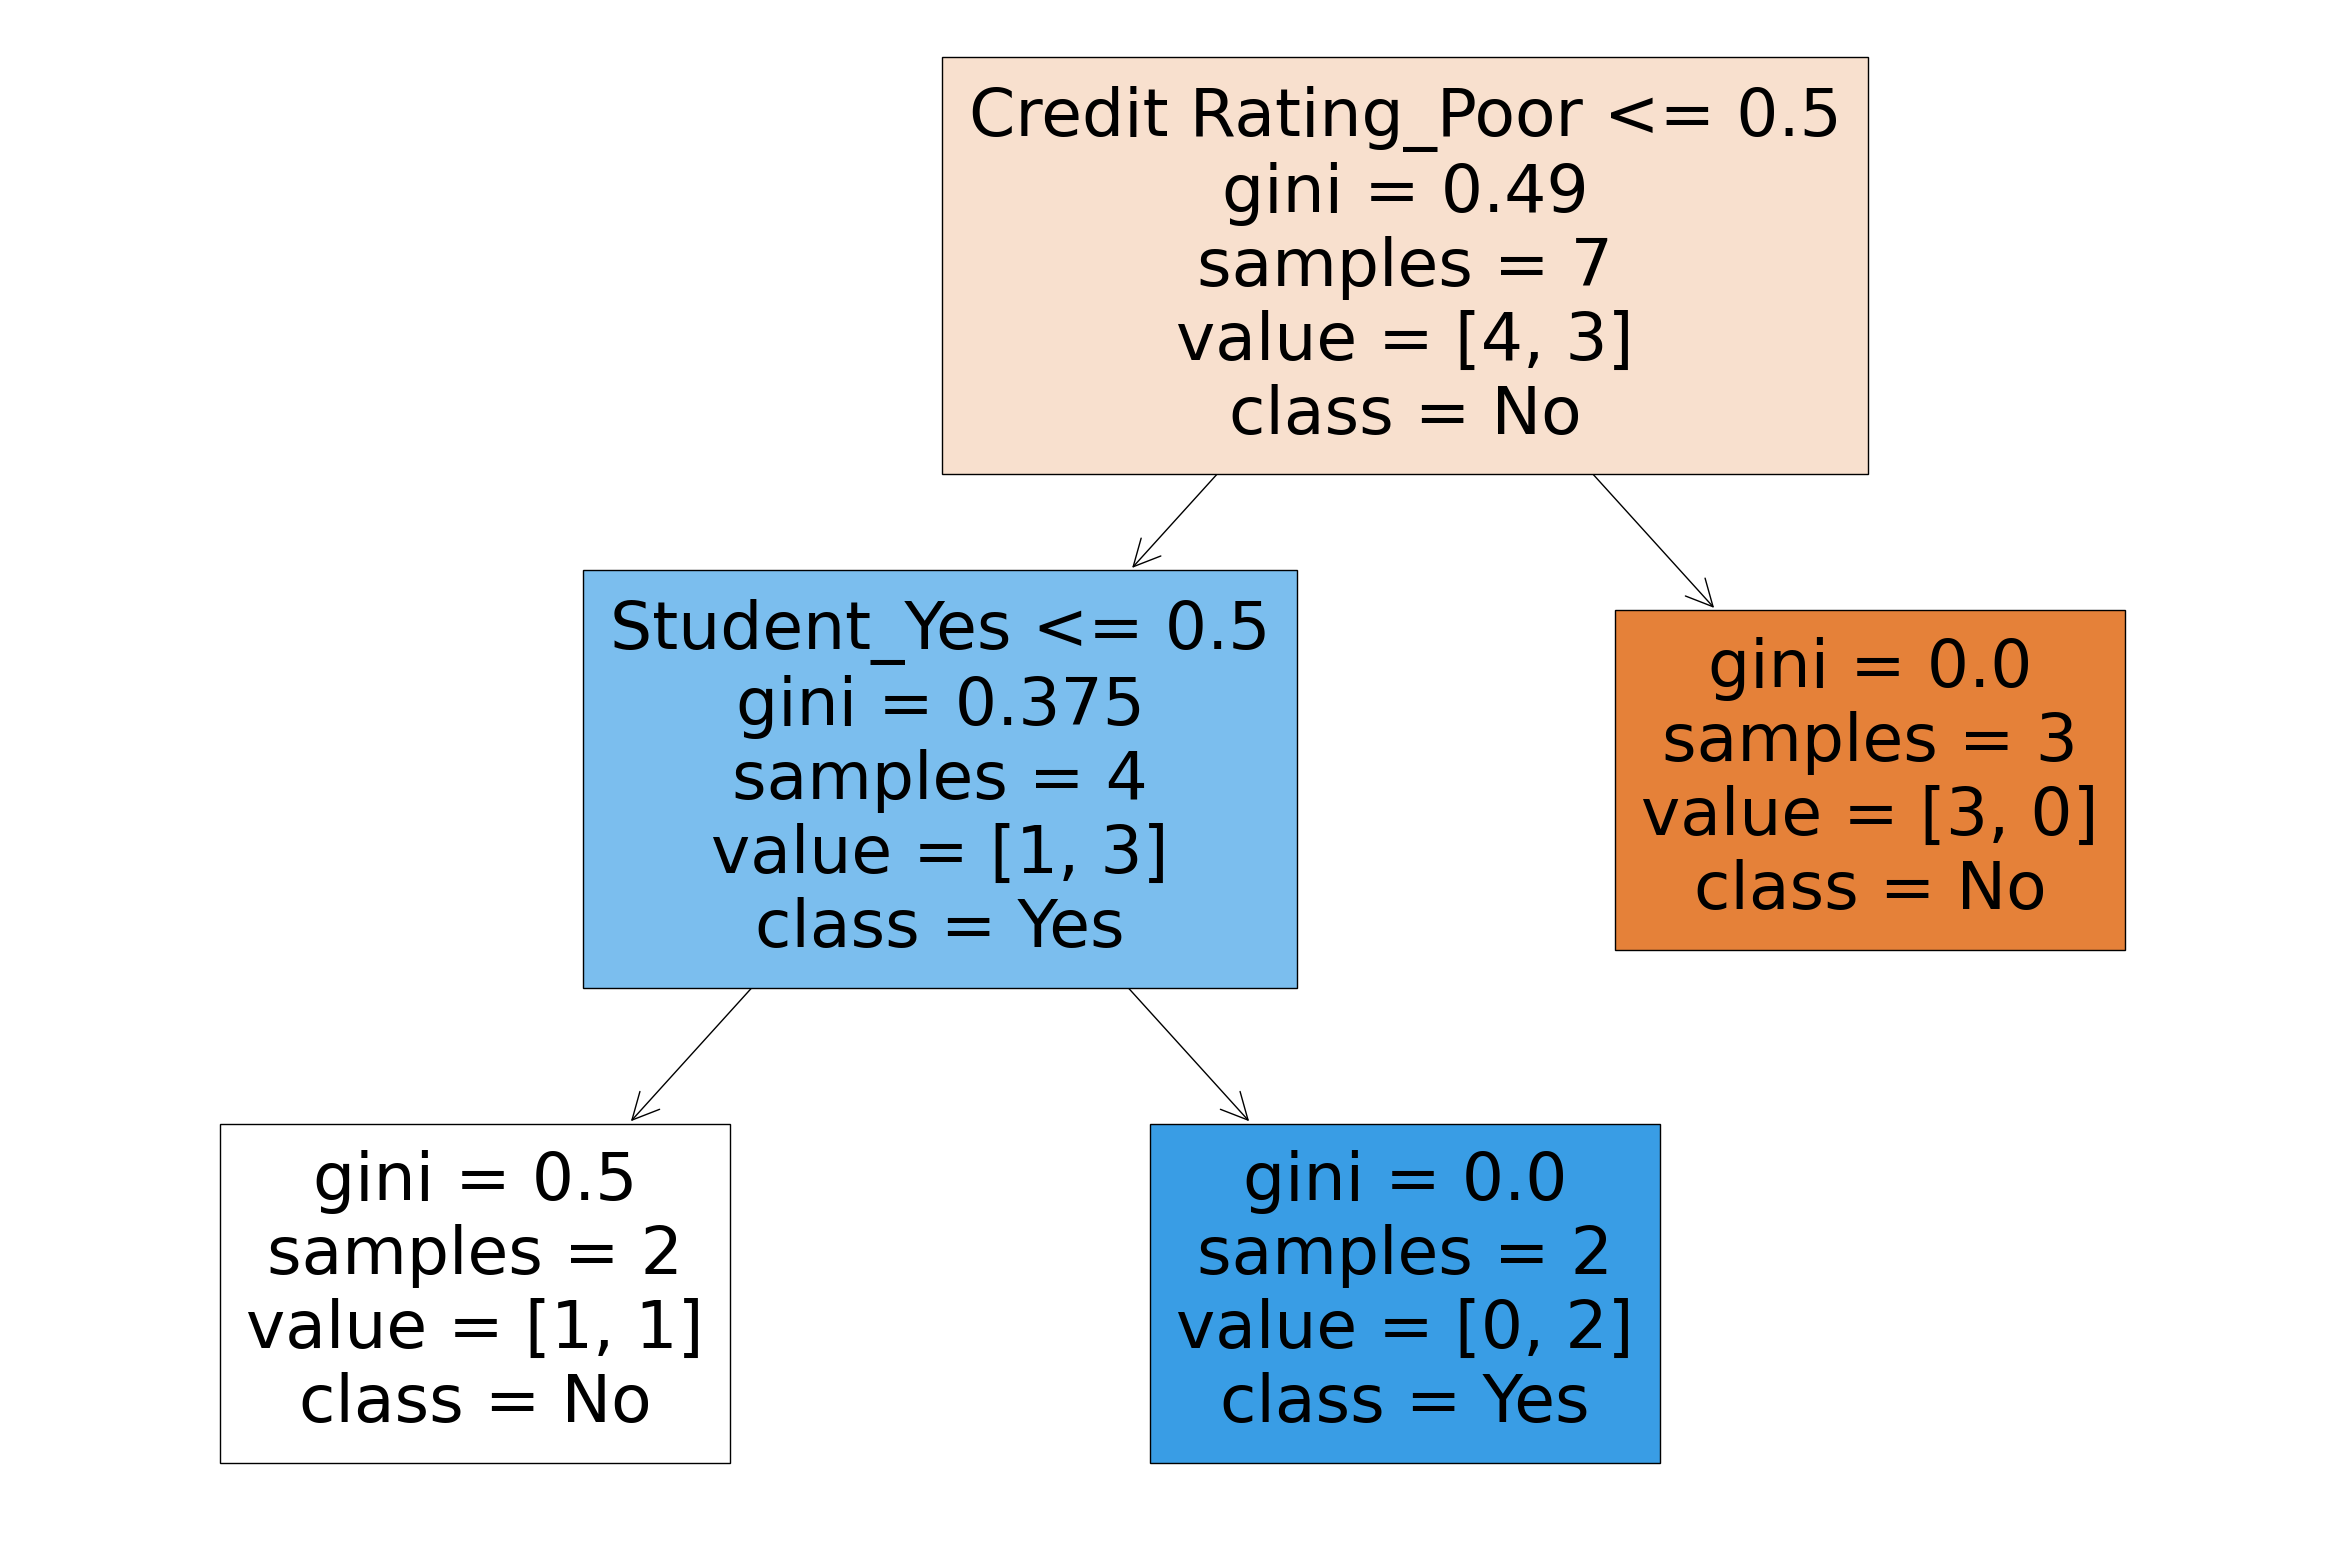

In [12]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model, feature_names=list(predictors_train.columns), class_names=['No','Yes'], filled=True)

### Q2. Please download spambase.csv from Beachboard, and build <br>
a.	A decision tree classifier <br>

Requirement: 
1.	Using 30% of the data as testing data
2.	Display the  confusion matrix of both training data and testing data
3.	Try to find a good tree with reasonable parameters and preformance. Do not just give me a fulltree!


### 1. Upload and clean data

In [13]:
spam = pd.read_csv("Spambase.csv")
spam

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [14]:
spam.head()

,make,address,all,W_3d,our,over,remove,internet,order,mail,...,C;,C(,C[,C!,C$,C#,CAP_avg,CAP_long,CAP_tot,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [15]:
spam.dtypes

make          float64
address       float64
all           float64
W_3d          float64
our           float64
over          float64
remove        float64
internet      float64
order         float64
mail          float64
receive       float64
will          float64
people        float64
report        float64
addresses     float64
free          float64
business      float64
email         float64
you           float64
credit        float64
your          float64
font          float64
W_000         float64
money         float64
hp            float64
hpl           float64
george        float64
W_650         float64
lab           float64
labs          float64
telnet        float64
W_857         float64
data          float64
W_415         float64
W_85          float64
technology    float64
W_1999        float64
parts         float64
pm            float64
direct        float64
cs            float64
meeting       float64
original      float64
project       float64
re:           float64
edu       

### 2. Partition the data set for Decision Tree model

In [16]:
# Partition the data
target = spam['Spam']
predictors = spam.drop(['Spam'], axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(3220, 57) (1381, 57) (3220,) (1381,)


In [17]:
# Examine the proportion of target variable for training data set
print(target_train.value_counts(normalize= True))

0    0.610559
1    0.389441
Name: Spam, dtype: float64


In [18]:
# Examine the proportion of target variable for testing data set
print(target_test.value_counts(normalize= True))

0    0.595221
1    0.404779
Name: Spam, dtype: float64


### 3. Decision Tree model prediction

In [19]:
# Build a decision tree model on training data with max_depth = 3
model = DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth=3)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

[Text(0.5, 0.875, 'C! <= 0.08\ngini = 0.476\nsamples = 3220\nvalue = [1966, 1254]\nclass = No'),
 Text(0.25, 0.625, 'remove <= 0.045\ngini = 0.257\nsamples = 1870\nvalue = [1587, 283]\nclass = No'),
 Text(0.125, 0.375, 'C$ <= 0.167\ngini = 0.17\nsamples = 1725\nvalue = [1563, 162]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.138\nsamples = 1674\nvalue = [1549, 125]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.398\nsamples = 51\nvalue = [14, 37]\nclass = Yes'),
 Text(0.375, 0.375, 'george <= 0.08\ngini = 0.276\nsamples = 145\nvalue = [24, 121]\nclass = Yes'),
 Text(0.3125, 0.125, 'gini = 0.175\nsamples = 134\nvalue = [13, 121]\nclass = Yes'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = No'),
 Text(0.75, 0.625, 'CAP_avg <= 2.292\ngini = 0.404\nsamples = 1350\nvalue = [379, 971]\nclass = Yes'),
 Text(0.625, 0.375, 'free <= 0.285\ngini = 0.475\nsamples = 448\nvalue = [274, 174]\nclass = No'),
 Text(0.5625, 0.125, 'gini = 0.37\nsamples = 335\nvalue = [253, 82]

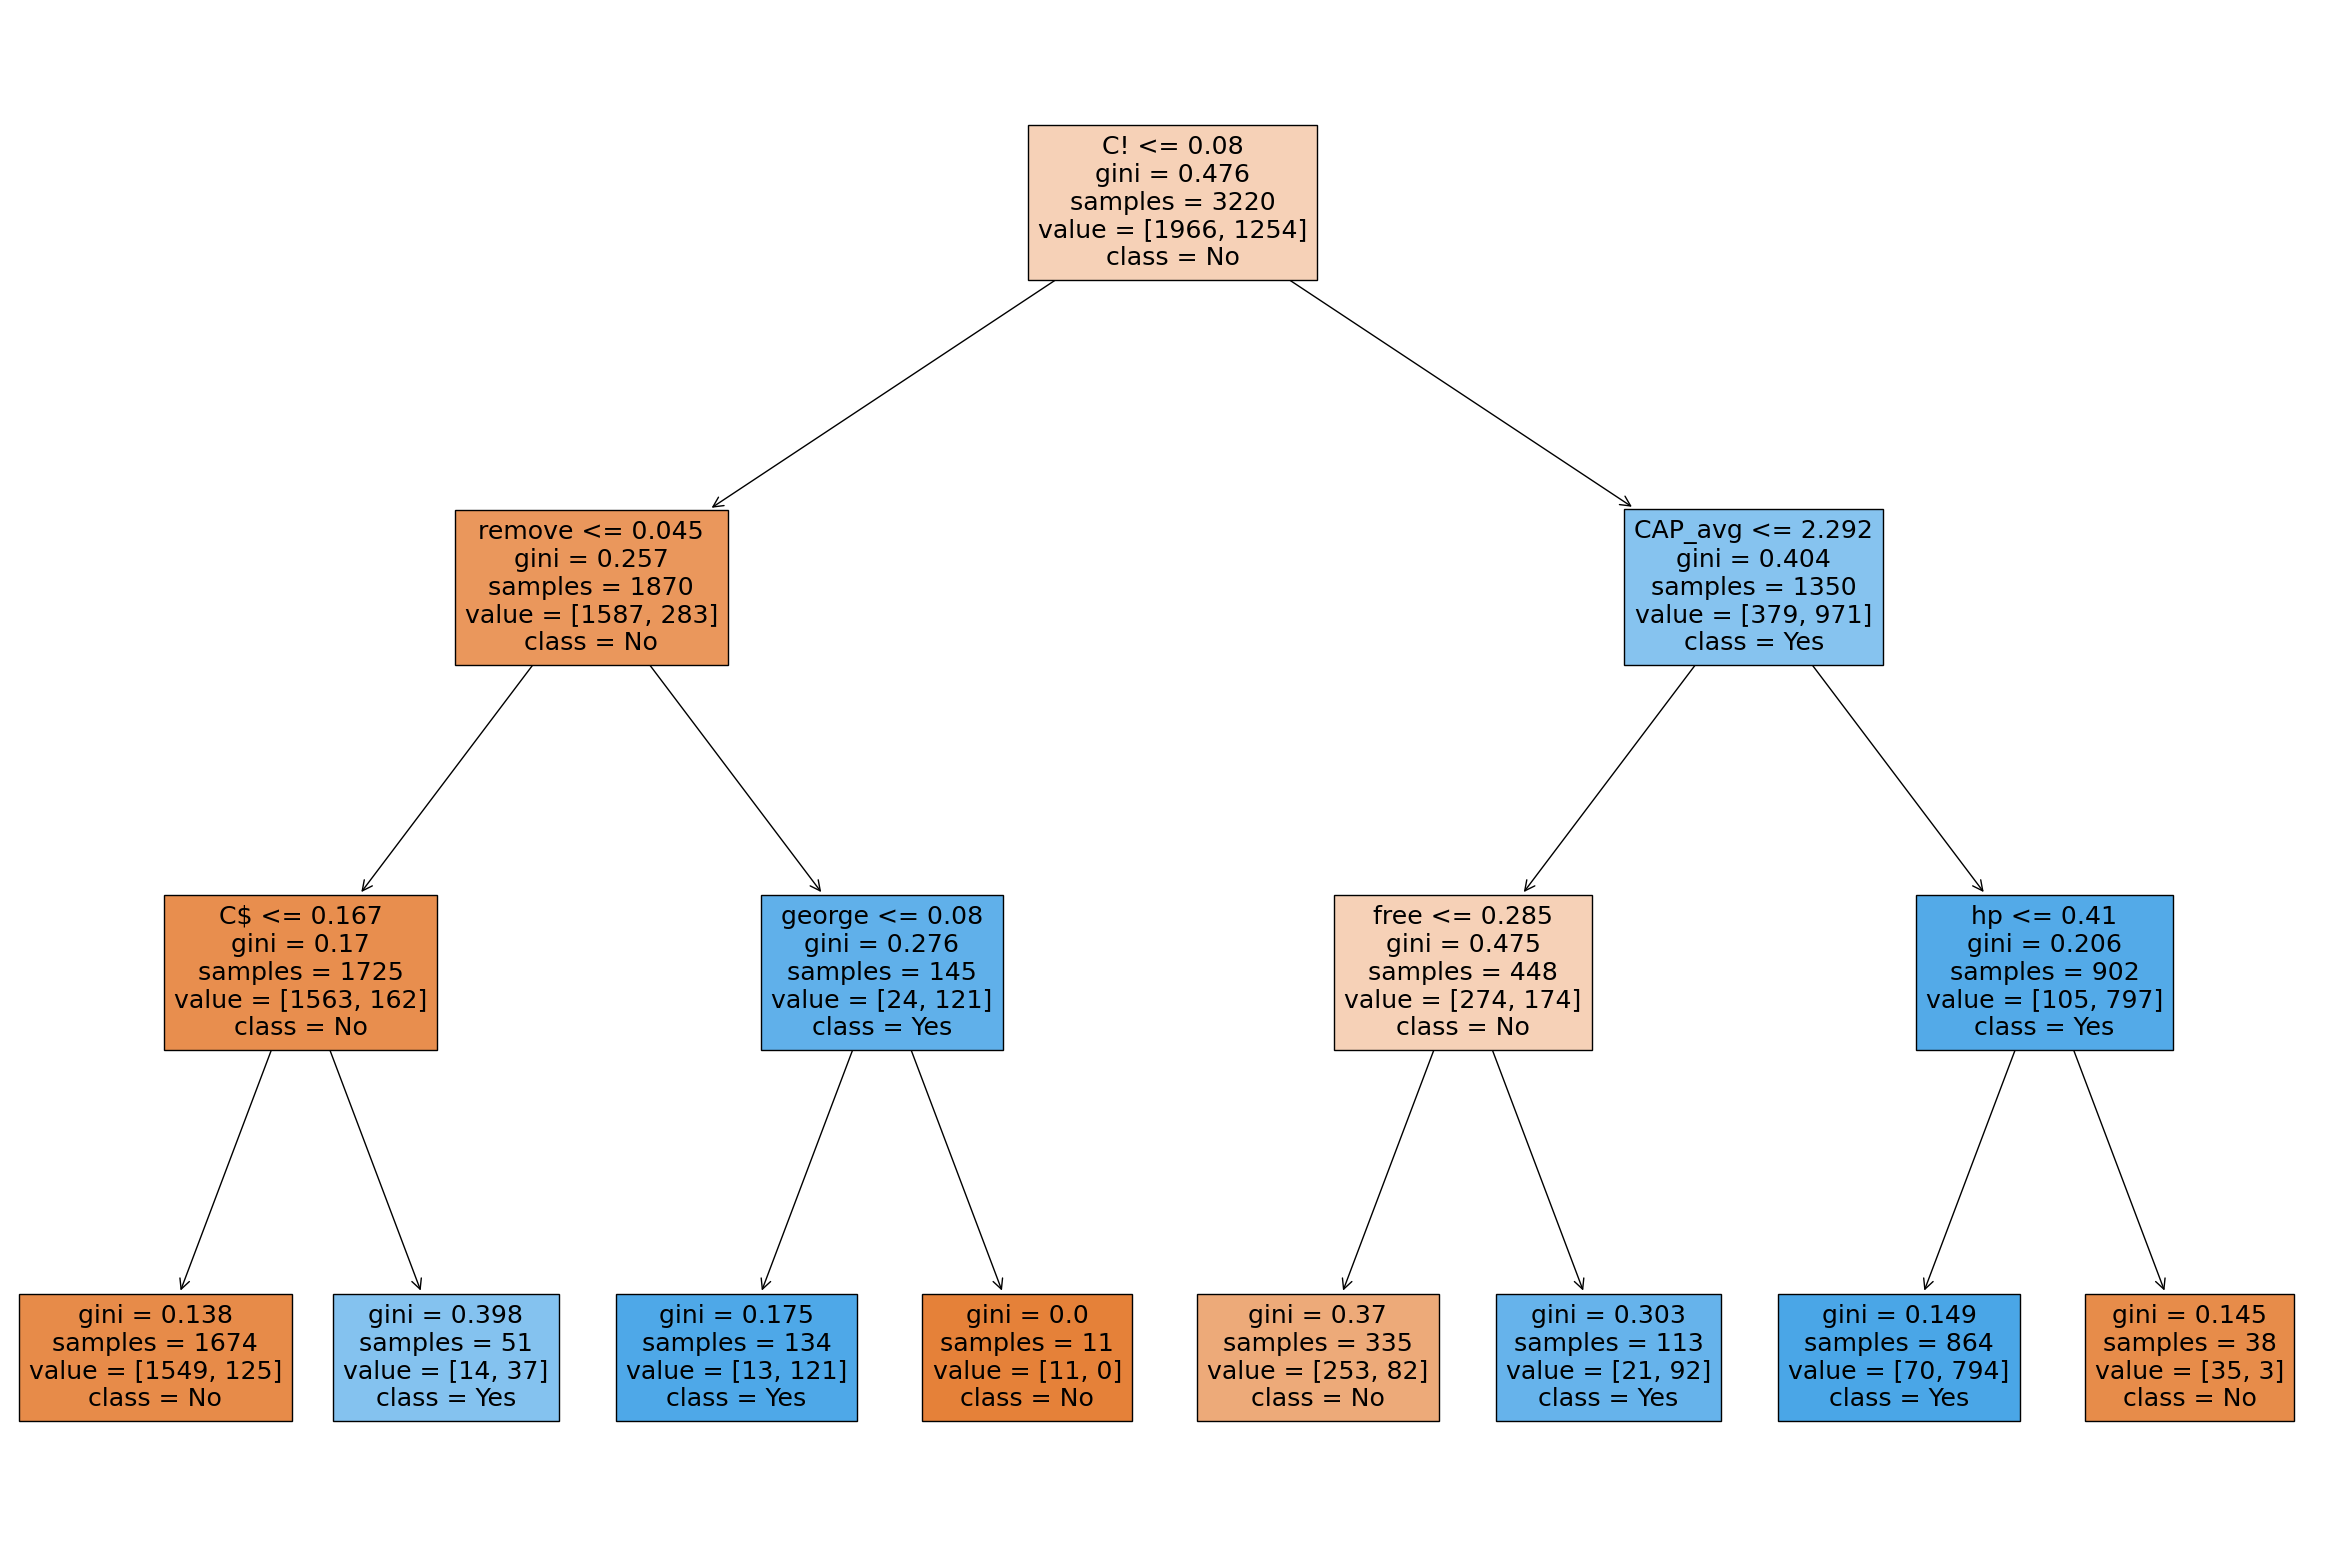

In [20]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model, feature_names=list(predictors_train.columns), class_names=['No','Yes'], filled=True)

In [21]:
# Make predictions on training and testing data
prediction_on_train = model.predict(predictors_train)
prediction_on_test = model.predict(predictors_test)

/Users/ninhnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


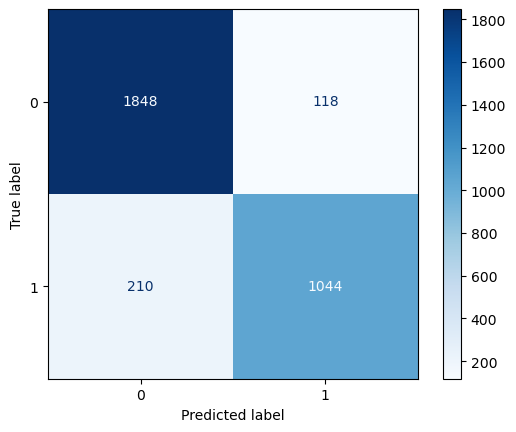

In [22]:
# Examine the evaluation results on training data: confusion_matrix
plot_confusion_matrix(model, predictors_train, target_train, cmap=plt.cm.Blues, values_format='d')

/Users/ninhnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


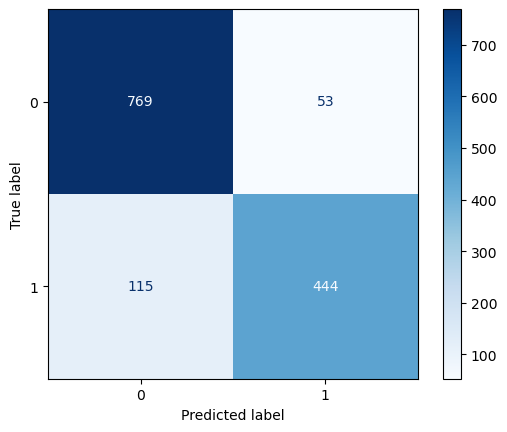

In [23]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [24]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1966
           1       0.90      0.83      0.86      1254

    accuracy                           0.90      3220
   macro avg       0.90      0.89      0.89      3220
weighted avg       0.90      0.90      0.90      3220



In [25]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       822
           1       0.89      0.79      0.84       559

    accuracy                           0.88      1381
   macro avg       0.88      0.86      0.87      1381
weighted avg       0.88      0.88      0.88      1381

